In [1]:
import pickle
import random
import math
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
#from sklearn.mixture import GMM
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_boston
from datetime import datetime
from datetime import timedelta
%matplotlib inline
# plt.matplotlib.rcParams.update({'font.size': 50})
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'   
plt.rcParams["patch.force_edgecolor"] = False
plt.rc('figure', titlesize=25)

In [3]:
PICKLE_PATH = '../augmented_datasets/pickles/hopkins_conf_gf0304_GDP.pkl'

In [11]:
hopkins_confirmed = pd.read_pickle(PICKLE_PATH)

In [5]:
hopkins_confirmed.describe()

,GDP,Urbanization,avg_m_tmp,avg_m_RH,avg_m_precip,avg_m_wind,Max_Cases,first_7,avg_interval_tmp,avg_interval_RH,...,3/18/2020,3/19/2020,3/20/2020,3/21/2020,3/22/2020,3/23/2020,3/24/2020,3/25/2020,3/26/2020,3/27/2020
count,173.000000,175.000000,179.000000,179.000000,179.000000,179.000000,179.000000,175.000000,179.000000,179.000000,...,879.000000,879.000000,879.000000,883.000000,891.000000,887.000000,887.000000,883.000000,883.000000,887.000000
mean,22914.926053,67.004503,13.268977,69.089437,0.025776,13.345976,3307.290503,3.755415,13.488844,66.943611,...,262.065154,292.989352,326.954266,362.572763,395.781302,443.281995,488.629357,546.928256,617.205436,686.214882
std,25283.463901,18.809505,11.001016,12.818640,0.208018,5.194059,13049.646784,2.512819,11.029080,12.485731,...,2766.090129,2930.789710,3129.942364,3363.235972,3592.691564,3939.299122,4281.289630,4748.131541,5365.408007,5995.989702
min,520.896603,14.338000,-16.157576,17.712121,0.000000,3.050000,20.000000,0.000000,-15.219048,18.733333,...,-26.700000,-25.700000,-22.400000,-23.400000,-18.200000,-6.700000,-11.700000,-11.900000,-9.300000,-22.300000
25%,5834.166211,58.130000,5.221392,62.871212,0.000000,9.965320,93.000000,2.117824,5.786264,59.117225,...,4.000000,4.400000,4.850000,5.265000,4.200000,4.200000,4.100000,4.450000,4.800000,5.900000
50%,9770.847088,66.813000,12.300000,73.015152,0.000000,12.372727,269.000000,3.126214,13.178571,69.857143,...,16.500000,15.900000,16.400000,18.700000,19.000000,19.300000,20.100000,20.400000,20.700000,20.700000
75%,41463.644020,81.411000,23.605303,78.664502,0.000000,16.126515,951.000000,4.771242,23.416667,76.086207,...,61.000000,62.000000,64.500000,67.000000,65.000000,62.000000,66.000000,70.000000,71.000000,73.000000
max,185741.280000,100.000000,32.556061,86.681818,2.289545,31.184848,101657.000000,13.000000,33.418182,86.055556,...,67800.000000,67800.000000,67800.000000,67800.000000,67800.000000,67800.000000,69176.000000,74386.000000,83836.000000,101657.000000


###### CORRELATIONS AND SCATTER PLOTS PER GF


Inetrval temp correaltion Pearson
GF_Q3              0.068834
first_7            0.010164
avg_interval_RH   -0.024265
GF_Q2             -0.036255
GF_Q1             -0.093777
dtype: float64

Inetrval temp correaltion Spearman
GF_Q3              0.202097
avg_interval_RH    0.071944
GF_Q2              0.057840
GF_Q1             -0.062317
first_7           -0.084797
dtype: float64


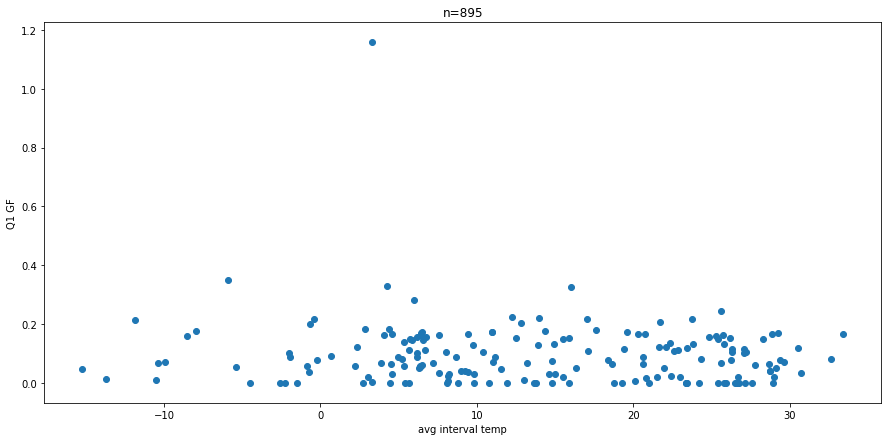

In [4]:
TMP_RATE = 1
RH_RATE = 1

confs1 = hopkins_confirmed[['avg_interval_tmp', 'avg_interval_RH', 'GF_Q1', 'GF_Q2', 'GF_Q3', 'first_7']]
confs1['avg_interval_tmp'] = confs1['avg_interval_tmp'] * TMP_RATE
confs1['avg_interval_RH'] = confs1['avg_interval_RH'] * RH_RATE

conf_corrs_p1 = confs1.corr().unstack().sort_values(kind="quicksort", ascending=False)
conf_corrs_p1 = conf_corrs_p1[conf_corrs_p1 != 1]
_ = conf_corrs_p1.drop_duplicates()
print('\nInetrval temp correaltion Pearson')
print(conf_corrs_p1['avg_interval_tmp'])

conf_corrs_s1 = confs1.corr('spearman').unstack().sort_values(kind="quicksort", ascending=False)
conf_corrs_s1 = conf_corrs_s1[conf_corrs_s1 != 1]
_ = conf_corrs_s1.drop_duplicates()
print('\nInetrval temp correaltion Spearman')
print(conf_corrs_s1['avg_interval_tmp'])

gf_q1_1 = confs1['GF_Q1'].loc[:,'data'].values.tolist()
avg_int_tmp1 = confs1['avg_interval_tmp'].loc[:,'data'].values.tolist()

fig, axes = plt.subplots(figsize=(15, 7))
_ = axes.scatter(avg_int_tmp1, gf_q1_1)
n = len(confs1)

_ = axes.set_xlabel('avg interval temp')
_ = axes.set_ylabel('Q1 GF')
_ = axes.set_title('n={0}'.format(n))


Significant correlations with p-values:

In [8]:
corr_1 = stats.pearsonr(gf_q1_1, avg_int_tmp1)
print('GF_Q1 vs avg_interval_tmp correaltion Pearson: {0}, p-value: {1}'.format(corr_1[0], corr_1[1]))

corr_1 = stats.spearmanr(gf_q1_1, avg_int_tmp1)
print('GF_Q1 vs avg_interval_tmp correaltion Spearman: {0}, p-value: {1}'.format(corr_1[0], corr_1[1]))


GF_Q1 vs avg_interval_tmp correaltion Pearson: -0.09377678897286003, p-value: 0.21180717334673405
GF_Q1 vs avg_interval_tmp correaltion Spearman: -0.062317471034286705, p-value: 0.4072652937748975


###### Correlations of case studies


Inetrval temp correaltion Pearson
GF_Q1             -0.228857
avg_interval_RH   -0.281563
GF_Q2             -0.297424
GF_Q3             -0.372656
first_7           -0.454502
dtype: float64

Inetrval temp correaltion Spearman
GF_Q1             -0.147084
avg_interval_RH   -0.174783
GF_Q2             -0.265217
GF_Q3             -0.379130
first_7           -0.555336
dtype: float64


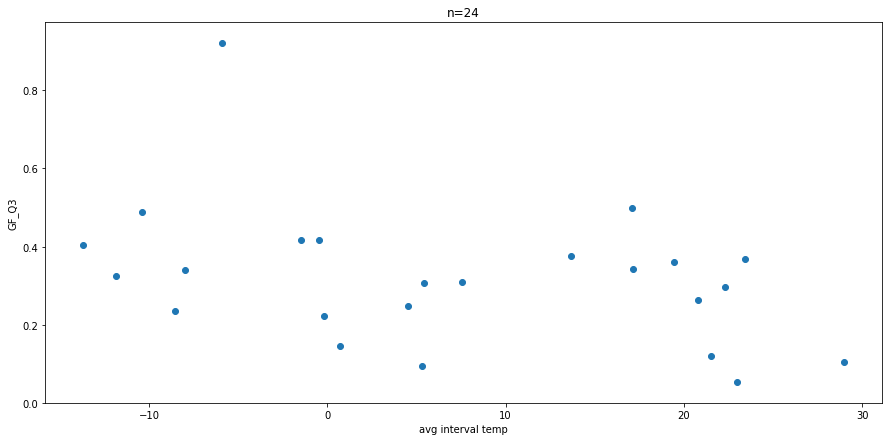

In [11]:
cold = ['Sweden', 'Norway', 'Canada', 'Ireland', 'Denmark']
hot = ['Australia', 'Taiwan*', 'Singapore', 'Qatar', 'Bahrain']

confs2 = hopkins_confirmed[hopkins_confirmed['Country_Region'].isin(hot + cold)]\
        [['avg_interval_tmp', 'avg_interval_RH', 'GF_Q1', 'GF_Q2', 'GF_Q3', 'first_7']]


conf_corrs_p2 = confs2.corr().unstack().sort_values(kind="quicksort", ascending=False)
conf_corrs_p2 = conf_corrs_p2[conf_corrs_p2 != 1]
_ = conf_corrs_p2.drop_duplicates()
print('\nInetrval temp correaltion Pearson')
print(conf_corrs_p2['avg_interval_tmp'])

conf_corrs_s2 = confs2.corr('spearman').unstack().sort_values(kind="quicksort", ascending=False)
conf_corrs_s2 = conf_corrs_s2[conf_corrs_s2 != 1]
_ = conf_corrs_s2.drop_duplicates()
print('\nInetrval temp correaltion Spearman')
print(conf_corrs_s2['avg_interval_tmp'])

gf_q3_2 = confs2['GF_Q3'].loc[:,'data'].values.tolist()
avg_int_tmp2 = confs2['avg_interval_tmp'].loc[:,'data'].values.tolist()

first_7_2 = confs2['first_7'].loc[:,'data'].values
first_7_2 = np.nan_to_num(first_7_2, nan=np.nanmean(first_7_2))

fig, axes = plt.subplots(figsize=(15, 7))
_ = axes.scatter(avg_int_tmp2, gf_q3_2)
n = len(confs2)

_ = axes.set_xlabel('avg interval temp')
_ = axes.set_ylabel('GF_Q3')
_ = axes.set_title('n={0}'.format(n))


In [13]:
corr_2 = stats.pearsonr(gf_q3_2, avg_int_tmp2)
print('GF_Q3 vs avg_interval_tmp correaltion Pearson: {0}, p-value: {1}'.format(corr_2[0], corr_2[1]))

corr_2 = stats.spearmanr(gf_q3_2, avg_int_tmp2)
print('GF_Q3 vs avg_interval_tmp correaltion Spearman: {0}, p-value: {1}'.format(corr_2[0], corr_2[1]))


GF_Q3 vs avg_interval_tmp correaltion Pearson: -0.372656161889746, p-value: 0.07290717875657918
GF_Q3 vs avg_interval_tmp correaltion Spearman: -0.37913043478260866, p-value: 0.0676846648820043


###### Rank sum
We regard two groups - 'cold' and 'hot' groups.
Each group's score is it's Q3 infection rate.
We will perform a Wilcoxon rank test and get a p-value for this arrangment

In [223]:
cold = ['Sweden', 'Norway', 'Canada', 'Ireland', 'Denmark']
hot = ['Australia', 'Taiwan*', 'Singapore', 'Qatar', 'Bahrain']
colds = hopkins_confirmed[hopkins_confirmed['Country_Region'].isin(cold)]\
        [['Country_Region', 'avg_interval_tmp', 'GF_Q3']]
hots = hopkins_confirmed[hopkins_confirmed['Country_Region'].isin(hot)]\
        [['Country_Region', 'avg_interval_tmp', 'GF_Q3']]

colds
hots

,,Country_Region,avg_interval_tmp,GF_Q3
coordinate,information,,,
"(44.681999999999995, -63.7443)",data,Canada,-0.436364,0.416075
"(46.5653, -66.4619)",data,Canada,-1.481818,0.417625
"(49.2827, -123.1207)",data,Canada,5.400000,0.307200
"(51.2538, -85.3232)",data,Canada,-8.528571,0.235550
"(52.9399, -106.4509)",data,Canada,-10.390909,0.489550
"(52.9399, -73.5491)",data,Canada,-11.862500,0.324800
"(53.1355, -57.6604)",data,Canada,-5.900000,0.921450
"(53.1424, -7.6921)",data,Ireland,7.553846,0.309925
"(53.7609, -98.8139)",data,Canada,-13.692857,0.404800


,,Country_Region,avg_interval_tmp,GF_Q3
coordinate,information,,,
"(-41.4545, 145.9707)",data,Australia,13.687500,0.375000
"(-37.8136, 144.9631)",data,Australia,17.128571,0.342500
"(-35.4735, 149.0124)",data,Australia,17.075000,0.500000
"(-34.9285, 138.6007)",data,Australia,19.428571,0.361200
"(-33.8688, 151.2093)",data,Australia,20.778571,0.264650
"(-31.9505, 115.8605)",data,Australia,23.457143,0.369750
"(-28.0167, 153.4)",data,Australia,22.335714,0.296050
"(1.2833, 103.8333)",data,Singapore,28.976596,0.104425
"(25.3548, 51.1839)",data,Qatar,23.006250,0.053100


In [33]:
colds = hopkins_confirmed[hopkins_confirmed['Country_Region'].isin(cold)]\
        [['GF_Q3']]

hots = hopkins_confirmed[hopkins_confirmed['Country_Region'].isin(hot)]\
        [['GF_Q3']]

colds.reset_index(level=[0,1], drop=True, inplace=True)
hots.reset_index(level=[0,1], drop=True, inplace=True)
colds.rename(columns={'GF_Q3': ''}, inplace=True)
hots.rename(columns={'GF_Q3': ''}, inplace=True)
colds = colds.T
hots = hots.T
colds = colds.add_prefix('c')
hots = hots.add_prefix('h')

ranks = colds.join(hots, lsuffix='first').rank(axis=1)

h_list = [sample for sample in ranks.columns if 'h' in sample]
c_list = [sample for sample in ranks.columns if 'c' in sample]

h_sum = ranks[h_list].sum(axis=1)
c_sum = ranks[c_list].sum(axis=1)

b = len(colds.columns)
n = b + len(hots.columns)
expected_cold_sum = (b * (n + 1)) / 2
sigma = math.sqrt(b * (n - b) * (n + 1) / 12)

sums_normal = stats.norm(loc=expected_cold_sum, scale=sigma)
p_value = 1 - sums_normal.cdf(float(c_sum))

print('Expected mean for cold countries rank sum: {0}\n'
     'Attained mean for cold countries rank sum: {1}\n'
     'p-value for this result is: {2}'.format(expected_cold_sum, c_sum, p_value))


Expected mean for cold countries rank sum: 175.0
Attained mean for cold countries rank sum:     184.0
dtype: float64
p-value for this result is: 0.29910164162725605


In [36]:
expected_cold_sum
c_sum
sigma

175.0

    184.0
dtype: float64

17.07825127659933

###### Correlations with GDP and Urbanisation normalization

Locations in entire dataset: 895
Location after thresholds: 172

Inetrval temp correaltion Pearson
GF_Q3              0.157438
GF_Q2              0.043817
first_7            0.006948
avg_interval_RH   -0.007187
GF_Q1             -0.057610
dtype: float64

Inetrval temp correaltion Spearman
GF_Q3              0.216142
avg_interval_RH    0.090630
GF_Q2              0.082590
GF_Q1             -0.051871
first_7           -0.089129
dtype: float64


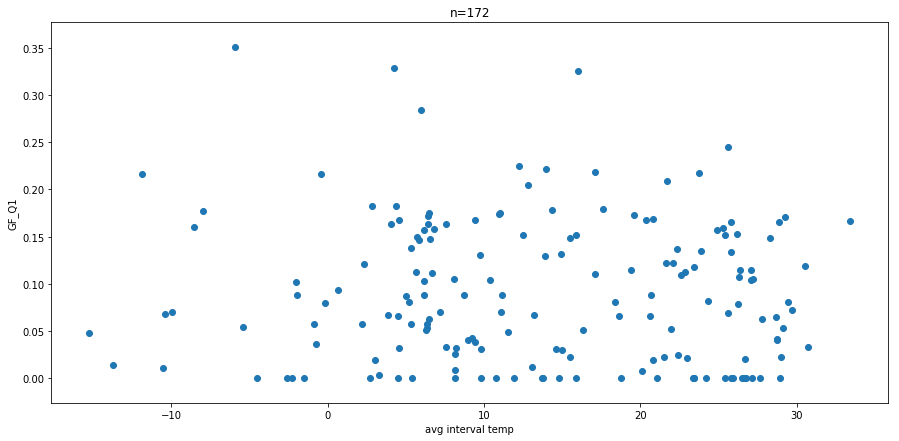

In [48]:
# hopkins_confirmed[hopkins_confirmed['Country_Region'].isin(['Australia', 'US', 'Israel', 'France'])]\
#                                     [['Country_Region', 'GDP', 'Urbanization']]
# gdp_mean = np.nanmean(hopkins_confirmed['GDP'].loc[:,'data'].values) 
# urb_mean = np.nanmean(hopkins_confirmed['Urbanization'].loc[:,'data'].values) 

GDP_THRESHOLD = 0
URB_THRESHOLD = 0
    # MEAN   - 22914, 67
    # USA    - 62794, 82
    # ISRAEL - 41715, 92
    # FRANCE - 41463, 80

confs3 = hopkins_confirmed[hopkins_confirmed['GDP'] > GDP_THRESHOLD]\
                        [hopkins_confirmed['Urbanization'] > URB_THRESHOLD]\
                        [['avg_interval_tmp', 'avg_interval_RH', 'GF_Q1', 'GF_Q2', 'GF_Q3', 'first_7']]
    
print('Locations in entire dataset: {0}\n'
      'Location after thresholds: {1}'.format(len(hopkins_confirmed), len(confs3)))

conf_corrs_p3 = confs3.corr().unstack().sort_values(kind="quicksort", ascending=False)
conf_corrs_p3 = conf_corrs_p3[conf_corrs_p3 != 1]
_ = conf_corrs_p3.drop_duplicates()
print('\nInetrval temp correaltion Pearson')
print(conf_corrs_p3['avg_interval_tmp'])

conf_corrs_s3 = confs3.corr('spearman').unstack().sort_values(kind="quicksort", ascending=False)
conf_corrs_s3 = conf_corrs_s3[conf_corrs_s3 != 1]
_ = conf_corrs_s3.drop_duplicates()
print('\nInetrval temp correaltion Spearman')
print(conf_corrs_s3['avg_interval_tmp'])

gf_q1_3 = confs3['GF_Q1'].loc[:,'data'].values.tolist()
avg_int_tmp_3 = confs3['avg_interval_tmp'].loc[:,'data'].values.tolist()

first_7_3 = confs3['first_7'].loc[:,'data'].values
first_7_3 = np.nan_to_num(first_7_3, nan=np.nanmean(first_7_3))

fig, axes = plt.subplots(figsize=(15, 7))
_ = axes.scatter(avg_int_tmp_3, gf_q1_3)
n = len(confs3)

_ = axes.set_xlabel('avg interval temp')
_ = axes.set_ylabel('GF_Q1')
_ = axes.set_title('n={0}'.format(n))


Significant correlations with p-values

In [303]:
corr_3 = stats.pearsonr(gf_q1_3, avg_int_tmp_3)
print('GF_Q1 vs avg_interval_tmp correaltion Pearson: {0}, p-value: {1}'.format(corr_3[0], corr_3[1]))

corr_3 = stats.spearmanr(gf_q1_3, avg_int_tmp_3)
print('GF_Q1 vs avg_interval_tmp correaltion Spearman: {0}, p-value: {1}'.format(corr_3[0], corr_3[1]))


GF_Q1 vs avg_interval_tmp correaltion Pearson: -0.26279370436910104, p-value: 0.08114753772707378
GF_Q1 vs avg_interval_tmp correaltion Spearman: -0.25335698689075775, p-value: 0.09310004401088315


###### Linear regression

In [ ]:
a